In [69]:
import cv2
import numpy as np

In [70]:
# connect to google drive
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

In [71]:
# load dataset 
X = np.load('X.npy')
Y = np.load('Y.npy')

In [72]:
# info about dataset
print(X.shape)
print(Y.shape)

(2062, 64, 64)
(2062, 10)


In [73]:
print(X[0])
print(Y[0])

[[0.46666667 0.4745098  0.47843137 ... 0.5176471  0.5137255  0.5019608 ]
 [0.49803922 0.4862745  0.4862745  ... 0.5254902  0.5176471  0.50980395]
 [0.54509807 0.49411765 0.49019608 ... 0.5294118  0.5254902  0.5137255 ]
 ...
 [0.5019608  0.5137255  0.5176471  ... 0.5529412  0.54509807 0.53333336]
 [0.49803922 0.5058824  0.5137255  ... 0.54509807 0.53333336 0.52156866]
 [0.49019608 0.49803922 0.5019608  ... 0.5294118  0.52156866 0.50980395]]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [74]:
# decode one hot encoded label Y
label=[]
for l in Y:
  label.append(np.argmax(l))
label=np.array(label)

In [75]:
label.shape

(2062,)

In [76]:
# correction of mismatched data label
label_map={0:9,1:0, 2:7, 3:6, 4:1, 5:8, 6:4, 7:3, 8:2, 9:5}
label_new=[]
for s in label:
  label_new.append(label_map[s])
label=np.array(label_new)
label.shape

(2062,)

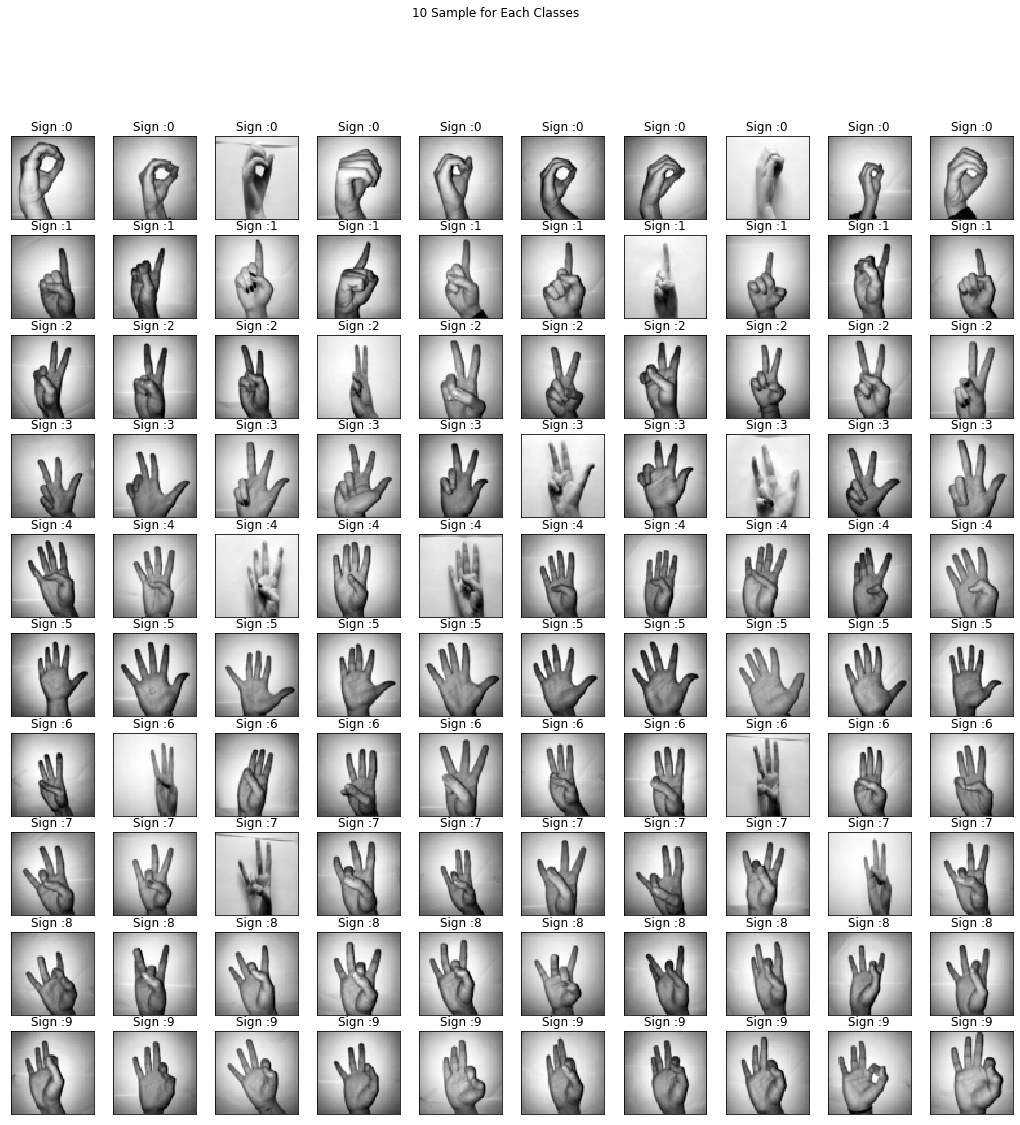

In [77]:
import matplotlib.pyplot as plt

n=10

fig, axarr=plt.subplots(nrows=n, ncols=n, figsize=(18, 18))
axarr=axarr.flatten()
plt_id=0
start_index=0
for sign in range(10):
  sign_indexes=np.where(label==sign)[0]
  for i in range(n):
    image_index=sign_indexes[i]
    axarr[plt_id].imshow(X[image_index], cmap='gray')
    axarr[plt_id].set_xticks([])
    axarr[plt_id].set_yticks([])
    axarr[plt_id].set_title("Sign :{}".format(sign))
    plt_id=plt_id+1
plt.suptitle("{} Sample for Each Classes".format(n))
plt.show()

In [78]:
# split dataset to train and test sets
from sklearn.model_selection import train_test_split

print(X.shape)
print(label.shape)

X_conv=X.reshape(X.shape[0], X.shape[1], X.shape[2],1)

X_train,X_test,Y_train,Y_test = train_test_split(X_conv, label, test_size=0.2, random_state=50)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(2062, 64, 64)
(2062,)
(1649, 64, 64, 1)
(1649,)
(413, 64, 64, 1)
(413,)


In [79]:
# model creation

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
    
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 62, 62, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
batch_normalization_v1_4 (Ba (None, 31, 31, 32)        128       
_________________________________________________________________
dropout_5 (Dropout)          (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
batch_normalization_v1_5 (Ba (None, 14, 14, 64)        256       
__________

In [80]:
# model compilation

from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.optimizers import Adadelta,RMSprop

X_conv=X.reshape(X.shape[0], X.shape[1], X.shape[2],1)

epochs=100

# early_stopping = EarlyStopping(monitor="val_loss", mode="min", patience=5)
# callbacks=[early_stopping]

model.compile(loss="sparse_categorical_crossentropy", optimizer=RMSprop(0.0001), metrics=['accuracy'])

hist=model.fit(X_train, Y_train, 
             validation_data=(X_test, Y_test),
             epochs=epochs,)
print(hist.history)



Train on 1649 samples, validate on 413 samples
Epoch 1/100
1649/1649 [==============================] - 2s 968us/sample - loss: 2.8765 - acc: 0.1195 - val_loss: 2.3345 - val_acc: 0.1308
Epoch 2/100
1649/1649 [==============================] - 1s 511us/sample - loss: 2.5301 - acc: 0.1674 - val_loss: 2.3913 - val_acc: 0.1308
Epoch 3/100
1649/1649 [==============================] - 1s 506us/sample - loss: 2.1570 - acc: 0.2656 - val_loss: 2.4774 - val_acc: 0.0920
Epoch 4/100
1649/1649 [==============================] - 1s 506us/sample - loss: 2.0154 - acc: 0.2893 - val_loss: 2.6363 - val_acc: 0.0847
Epoch 5/100
1649/1649 [==============================] - 1s 515us/sample - loss: 1.8284 - acc: 0.3669 - val_loss: 2.8755 - val_acc: 0.0847
Epoch 6/100
1649/1649 [==============================] - 1s 500us/sample - loss: 1.6830 - acc: 0.4203 - val_loss: 3.1116 - val_acc: 0.0847
Epoch 7/100
1649/1649 [==============================] - 1s 504us/sample - loss: 1.5541 - acc: 0.4366 - val_loss: 3.378

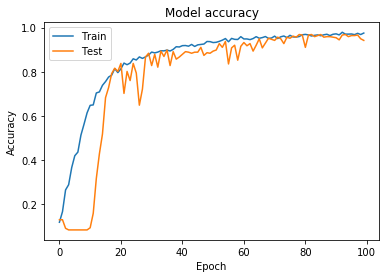

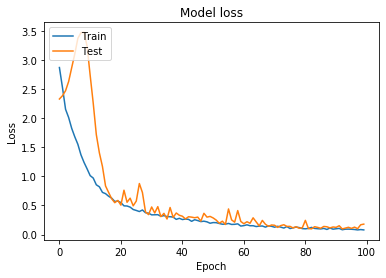

In [81]:
# Plot training & validation accuracy values

import matplotlib.pyplot as plt

plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
# plt.savefig("abc76.png")
plt.show()

# Plot training & validation loss values
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
# plt.savefig("bc76.png")
plt.show()

In [82]:
# import tensorflow.keras.backend.clear_session
# tensorflow.keras.backend.clear_session()

In [83]:
# import keras as K
# K.backend.clear_session()

In [84]:
model.save('model.h5')

In [85]:
model.evaluate(X_test,Y_test,verbose=1)

413/413 [==============================] - 0s 220us/sample - loss: 0.1787 - acc: 0.9419


[0.17872237821828943, 0.94188863]